# CNN CIFAR 10 Example v2

## <span style="font-size:25px">성능 향상을 위한 CNN 구조 및 데이터( 정확도/, 오버피팅\ )</span>

<img src="picture/TF_img_17_1.png" alt="TF_img_17_1" width=1000>

## <span style="font-size:25px">CIFAR 10 Example v2</span>

In [1]:
# [1] CIFAR-10 데이터 불러오기 및 정규화

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, t_train), (x_test, t_test) = cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

print(x_train.shape, x_test.shape)
print(t_train.shape, t_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [2]:
# [2] CIFAR 10 데이터 보강(150% 증대)

gen = ImageDataGenerator(rotation_range=20, 
                         shear_range=0.2, 
                         width_shift_range=0.2, 
                         height_shift_range=0.2, 
                         horizontal_flip=True)

augment_ratio = 1.5  # 전체 데이터의 150%
augment_size = int(augment_ratio * x_train.shape[0])

randidx = np.random.randint(x_train.shape[0], size=augment_size)

x_augmented = x_train[randidx].copy()   # copy() 사용 해 원본
t_augmented = t_train[randidx].copy()   # 데이터 복사 만듦

x_augmented, t_augmented = gen.flow(x_augmented, t_augmented, 
                                    batch_size=augment_size, 
                                    shuffle=False).next()

x_train = np.concatenate( (x_train, x_augmented) )
t_train = np.concatenate( (t_train, t_augmented) )


# 보강은 학습 데이터, 정답 데이터를 랜덤하게 적용
s = np.arange(x_train.shape[0])
np.random.shuffle(s)

x_train = x_train[s]
t_train = t_train[s]

In [3]:
# [3] CNN 모델 구축

cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
cnn.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation="relu"))      # 은닉층 개념
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))    # 출력층 개념

In [4]:
# [4] CNN 모델 컴파일 및 학습

cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

hist = cnn.fit(x_train, t_train, batch_size=256, epochs=250, validation_data=(x_test, t_test))

Epoch 1/250
489/489 [==============================] - 22s 24ms/step - loss: 1.7757 - accuracy: 0.3316 - val_loss: 1.3705 - val_accuracy: 0.5005
Epoch 2/250
489/489 [==============================] - 11s 22ms/step - loss: 1.3425 - accuracy: 0.5202 - val_loss: 1.0786 - val_accuracy: 0.6050
Epoch 3/250
489/489 [==============================] - 11s 22ms/step - loss: 1.1647 - accuracy: 0.5889 - val_loss: 0.9733 - val_accuracy: 0.6467
Epoch 4/250
489/489 [==============================] - 11s 22ms/step - loss: 1.0494 - accuracy: 0.6315 - val_loss: 0.8471 - val_accuracy: 0.6969
Epoch 5/250
489/489 [==============================] - 11s 22ms/step - loss: 0.9676 - accuracy: 0.6626 - val_loss: 0.7522 - val_accuracy: 0.7323
Epoch 6/250
489/489 [==============================] - 11s 23ms/step - loss: 0.9087 - accuracy: 0.6850 - val_loss: 0.7698 - val_accuracy: 0.7306
Epoch 7/250
489/489 [==============================] - 10s 21ms/step - loss: 0.8638 - accuracy: 0.7035 - val_loss: 0.6636 - val_ac

In [5]:
# [5] 모델 평가

cnn.evaluate(x_test, t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4770 - accuracy: 0.8634


[0.4769520163536072, 0.8633999824523926]

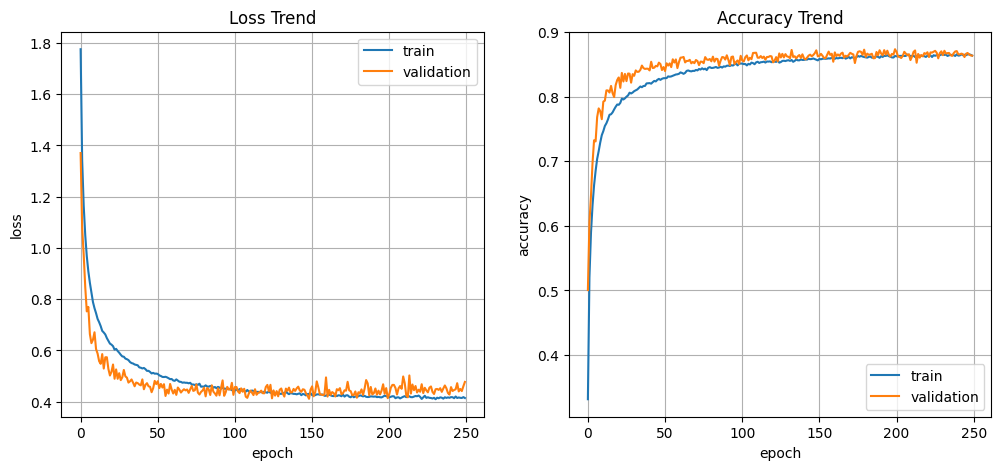

In [6]:
# [6] 손실 및 정확도

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='best')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='best')
plt.grid()

plt.show()